In [2]:
#Implement Random Forest Classifier model to predict the safety of the car.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
car = pd.read_csv("car_evaluation.csv")
car.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
print("Number of rows: ", car.shape[0], "\nNumber of columns: ", car.shape[1])

Number of rows:  1727 
Number of columns:  7


In [9]:
print("Name of columns: ", car.columns)

Name of columns:  Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')


In [5]:
car.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
car.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [10]:
#Encode Categorical Variables
le = LabelEncoder()
for col in car.columns:
    car[col] = le.fit_transform(car[col])

In [11]:
# Split Features and Target
X = car.drop('unacc', axis=1)  # Features
y = car['unacc']

In [12]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
#  Predictions
y_pred = rf_model.predict(X_test)

In [15]:
# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.9624277456647399

Confusion Matrix:
[[ 72   1   3   1]
 [  2  10   0   3]
 [  1   0 236   0]
 [  2   0   0  15]]


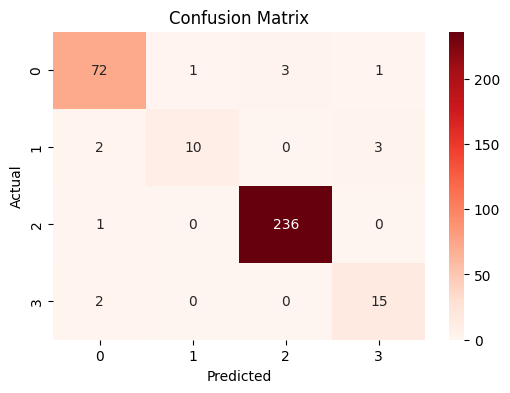

In [19]:
# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [17]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.91      0.67      0.77        15
           2       0.99      1.00      0.99       237
           3       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



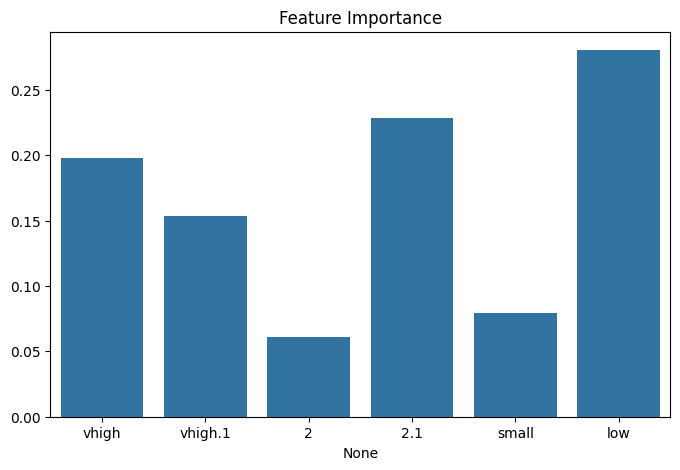

In [18]:
# Feature Importance 
importances = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8,5))
sns.barplot(x=feature_names, y=importances)
plt.title("Feature Importance")
plt.show()